In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative
from scipy.interpolate import lagrange
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.style.use('seaborn-poster')

### Numerical Differentiation

- Analytical differentiation gives an exact answer for the n-th order derivative of a function, f.
- In practice, the derivative of a function is essntial for understanding the dynamics of many different systems, especially in engineering and optimization problems.  
- However, the exact derivative for a complex function may not be attainable analytically or may need to be computed in a discretized way.  
- Using the numerical approach (central, forward, backward, for example) to approximate the derivative of a function is ideal in this context.  
- The local and global error between the exact and computed solution is determined so to be cognizant of allowable tolerances and the potential for error propagation (for example, in higher order derivatives of the same function when noise is present)

#### Example using f(x) = sin(x)

- Using the sin(x) function to demonstrate central difference numeric differentiation with and without normally distributed noise


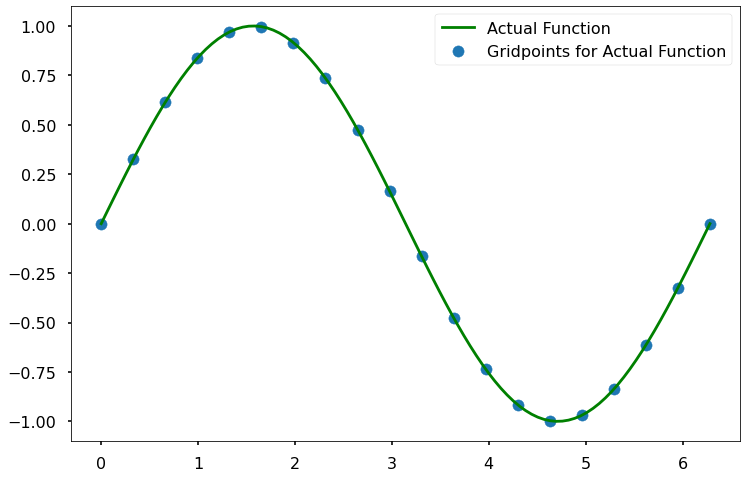

In [303]:

# The function generate_data adds randomly distributed noise to the function, returning x and y values

y = lambda x: np.sin(x)
fine_grid = np.linspace(0,2*np.pi,100)

def generate_data(y,n_max, n):
    x = np.linspace(0,n_max, n)
    noise = np.random.normal(0,.1,len(x))
    noise_y = y(x) + noise
    return x,noise_y

x, noisy_y = generate_data(y,2*np.pi,20)

plt.figure(figsize = (12, 8))
plt.plot(fine_grid,y(fine_grid),c='g', label='Actual Function')
plt.scatter(x, y(x), label="Gridpoints for Actual Function")
plt.legend()
plt.show()


#### Noisy Data
- Simulated data is convienent because we know the underlying true distribution, function, and other data set characteristics.  
- However, real data is noisy, which can arise from fluctuations or errors in instrumentation or data collection, naturally occuring variance, etc.  

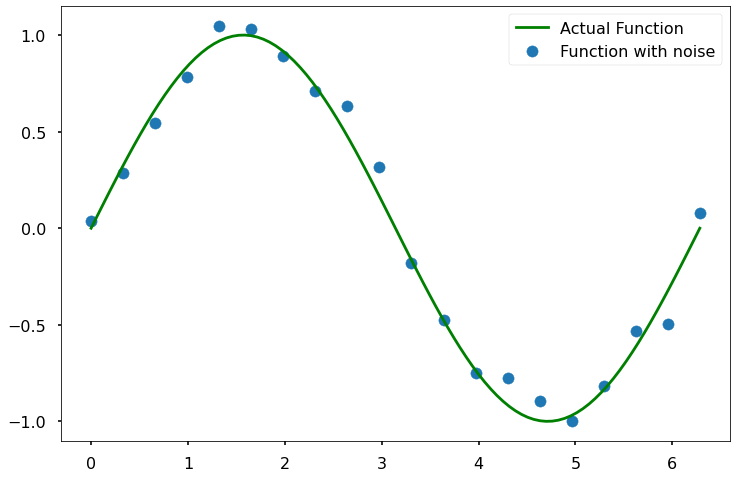

In [282]:
# Add Noise and plots the noisy functions points against the actual function for sin(x)

plt.figure(figsize = (12, 8))
plt.scatter(x, noisy_y, label="Function with noise")
plt.plot(fine_grid,y(fine_grid),c='g', label='Actual Function')
plt.legend()
plt.show()


- Approximating an underlying ditribution or function for the data can be accomplished through various methods.  Achieving a smooth, continuous function that is differentiable is a common task.  

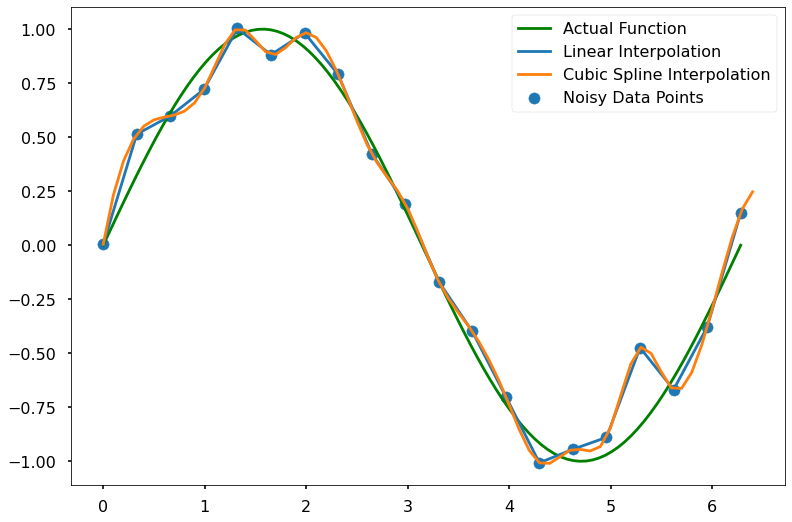

In [258]:
# Fit the noisy data and apply linear and cubic spline interpolation methods to noisy data

f1 = scipy.interpolate.interp1d(x,noisy_y, kind = "linear")
f2 = scipy.interpolate.CubicSpline(x, noisy_y)

x_new = np.arange(0, 6.5, 0.1)

plt.scatter(x, noisy_y, label='Noisy Data Points')
plt.plot(fine_grid,y(fine_grid),c='g', label='Actual Function')
plt.plot(x,f1(x), label='Linear Interpolation')
plt.plot(x_new,f2(x_new), label="Cubic Spline Interpolation")
plt.legend()
plt.show()

- The numerical method for differentiation is appropriate when the analytic solution is otherwise inaccessible, the function is discretized for computation, and approaching areas of the function where the derivative does not exist at a point.  
- The central difference formula is a common computational method for approximating the derivative with a good degree of accuracy.  

In [259]:
# Take central difference numerical derivative of fitted cubic split for first derivative

def cent_diff(f,x,h=0.01):
    central_diff = (f(x+h) - f(x-h))/(2*h)
    return central_diff

deriv_y_spline = cent_diff(f2,x_new)
deriv_cent = cent_diff(y,x)
analy_deriv = np.cos(x)


- The derviative of a function with high variance is typically unusable, especially in higher order derivatives.  
- It may be necessary to use a well fit approximation of the underlying function (i.e. modeling the signal) with interpolation, smoothing, regression, or other methods that can achieve a differentiable function.  

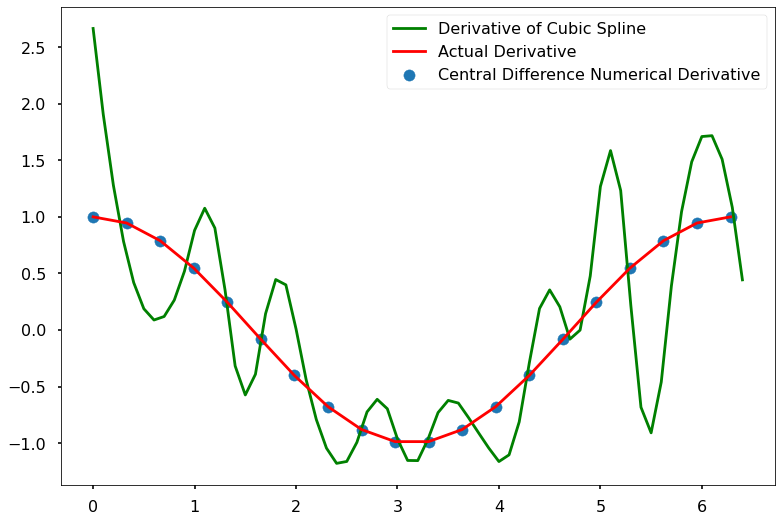

In [265]:
# with noisy data, even the first derivative becomes unusable for spline fit

plt.plot(x_new,deriv_y_spline, label = 'Derivative of Cubic Spline', c='g')
plt.plot(x,analy_deriv, label='Actual Derivative', c='r')
plt.scatter(x,deriv_cent, label='Central Difference Numerical Derivative')
plt.legend()
plt.show()

- The standard cubic spline interpolation on the noisy data does not yield a stable derivative since there is too much flexibility in capturing every data point.  
- Applying a LOWESS smoothing function to the data is a common statistical technique that may results is a less flexible function that has a more stable derivative.  
- What is applied to the data to determine the true underlyuing function that maps x to y, is dependent on the characteristics and context of the data collected

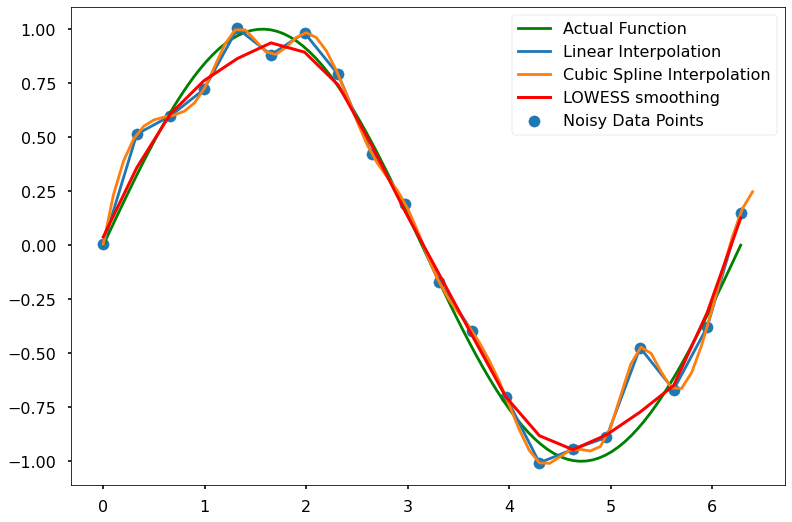

In [277]:
# applying the LOWESS smoothing function to the data

smoothed = lowess(noisy_y,x,frac=0.2)

plt.scatter(x, noisy_y, label='Noisy Data Points')
plt.plot(fine_grid,y(fine_grid),c='g', label='Actual Function')
plt.plot(x,f1(x), label='Linear Interpolation')
plt.plot(x_new,f2(x_new), label="Cubic Spline Interpolation")
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r-', linewidth=3, label='LOWESS smoothing')
plt.legend()
plt.show()

- In this case, the LOWESS smoothing gives us a reasonable appriximation to the true function

In [267]:
# Extract x and y data points from lowess

smoothed_x = list(zip(*smoothed))[0]
smoothed_y = list(zip(*smoothed))[1]

In [268]:
# Store the x and y data to arrays

smooth_x = np.array(smoothed_x)
smooth_y = np.array(smoothed_y)

In [269]:
# Apply interpolation to the lowess data

f_smooth = interp1d(smoothed_x, smoothed_y, bounds_error=False)

In [270]:
# Use the central difference to approximate the first derivative of the true function

diff_smooth = cent_diff(f_smooth, smooth_x)

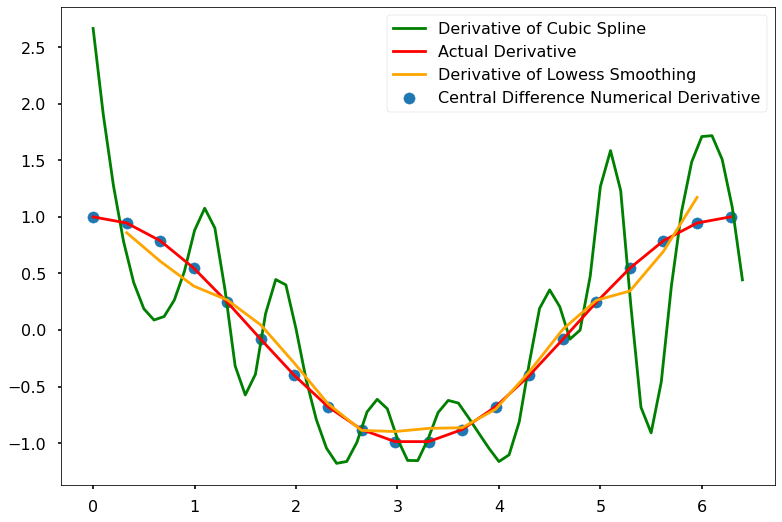

In [273]:
# Plot a comparison of the different derivatives

plt.plot(x_new,deriv_y_spline, label = 'Derivative of Cubic Spline', c='g')
plt.plot(x,analy_deriv, label='Actual Derivative', c='r')
plt.scatter(x,deriv_cent, label='Central Difference Numerical Derivative')
plt.plot(smooth_x, diff_smooth, label='Derivative of Lowess Smoothing',c='orange')
plt.legend()
plt.show()

- While the the LOWESS smoothing allows us to acheive a realtively good approximation of the frist derivate for the true function, there still exists some variance (or "problem" areas for subsequent differentiation) that will allow error in the derivative to propagate in higher orders.  